In [38]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

# From:
# https://answers.opencv.org/question/82453/calculate-surface-normals-from-depth-image-using-neighboring-pixels-cross-product/

# Mat normals(depth.size(), CV_32FC3);
# for(int x = 0; x < depth.rows; ++x)
# {
#     for(int y = 0; y < depth.cols; ++y)
#     {
#         // use float instead of double otherwise you will not get the correct result
#         // check my updates in the original post. I have not figure out yet why this
#         // is happening.
#         float dzdx = (depth.at<float>(x+1, y) - depth.at<float>(x-1, y)) / 2.0;
#         float dzdy = (depth.at<float>(x, y+1) - depth.at<float>(x, y-1)) / 2.0;

#         Vec3f d(-dzdx, -dzdy, 1.0f);

#         Vec3f n = normalize(d);
#         normals.at<Vec3f>(x, y) = n;
#     }
# }

# imshow("normals", normals);

# Parameters for SPAD Galvo "Camera"
focal_length = [758.2466 791.2153]  # (X, Y)
principal_point = [311.7251 235.8589] # (X, Y), from bottom left corner


In [41]:
def normals_from_depth(depth):
    """
    Compute surface normals of a depth map.
    """
    dzdx = (depth[:, 2:] - depth[:, :-2])/2.
    dzdy = (depth[:-2, :] - depth[2:, :])/2.
    n = np.array((-dzdx[1:-1, :], -dzdy[:, 1:-1], np.ones_like(dzdx[1:-1,:])))
    n /= np.sqrt(np.sum(n**2, axis=0)) # Normalize each vector
    return n
    
    

In [49]:
depthx, depthy = np.meshgrid(np.linspace(0,7, 8), np.linspace(0, 1, 8))
xn = normals_from_depth(depthx)
yn = normals_from_depth(depthy)
print(normals_from_depth(depthx))
print(normals_from_depth(depthy))


[[[-0.70710678 -0.70710678 -0.70710678 -0.70710678 -0.70710678
   -0.70710678]
  [-0.70710678 -0.70710678 -0.70710678 -0.70710678 -0.70710678
   -0.70710678]
  [-0.70710678 -0.70710678 -0.70710678 -0.70710678 -0.70710678
   -0.70710678]
  [-0.70710678 -0.70710678 -0.70710678 -0.70710678 -0.70710678
   -0.70710678]
  [-0.70710678 -0.70710678 -0.70710678 -0.70710678 -0.70710678
   -0.70710678]
  [-0.70710678 -0.70710678 -0.70710678 -0.70710678 -0.70710678
   -0.70710678]]

 [[-0.         -0.         -0.         -0.         -0.
   -0.        ]
  [-0.         -0.         -0.         -0.         -0.
   -0.        ]
  [-0.         -0.         -0.         -0.         -0.
   -0.        ]
  [-0.         -0.         -0.         -0.         -0.
   -0.        ]
  [-0.         -0.         -0.         -0.         -0.
   -0.        ]
  [-0.         -0.         -0.         -0.         -0.
   -0.        ]]

 [[ 0.70710678  0.70710678  0.70710678  0.70710678  0.70710678
    0.70710678]
  [ 0.70710678  0

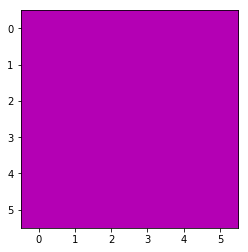

In [55]:
# print(xn.shape)
plt.imshow(np.abs(xn).transpose(1, 2, 0))

0.7071067811865476